# Introduction

Name : Rahardiansyah Fatoni

Batch : RMT-027

Graded Course 4 - Objective : EDA, Feature Engineering, and defining, training, and evaluation of machine learning model of features to price of ride share services. Finally, we will draw a conclusion based on the results and model inference.

# 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,classification_report, f1_score

# 2. Data Loading

https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/rideshare_kaggle.csv', on_bad_lines ='skip')

In [4]:
# df.head() to see the summary of the df
df.head().T #.T is used to show the entire column

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [5]:
df.info() #to see information about the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

There is 693071 entries in the dataset, and only `price` have a detectable NaN value.

In [6]:
# REMOVING DUPLICATE
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

It seems after using .drop_duplicates() on the dataset, there is still 693071 entries, which means there are no duplicates to be removed.

In [8]:
# REMOVING THE NaN VALUE
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [1]:
df.describe() #To describe the df (mean, count, etc.)

NameError: name 'df' is not defined

Since there are 57 columns, with 46 numerical columns, we need to see how much unique values are within these columns.

In [10]:
unique_counts = df.nunique()
unique_counts

id                             637976
timestamp                       35796
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         12
name                               12
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

From these, let's make a few assumptions before we go ahead and do an EDA:
- `datetime` and `timestamp` will be removed, since it will be represented by `hour`, `day`, and `month`.
- `timezone` has only 1 unique value, so it would be best removed.
- `long_summary` will also be removed since after a quick observation it seems inconsistent with the `short_summary`.
- `precipIntensity` will be used to represent the "weather" since it is in numerical format so as to not need to encode it.
- `product_id` and `name` is directly dependent on each other, we shall only use the `name` column since it is easier to intepret.
- `cab_type` have either "Lyft" or "Uber" as it's values, hence we shall encode it into 1 and 0 later.


In conclusion, we will use `hour`, `day`, `month`, `name`, `price`, `distance`, `source`, `destination`, `cab_type`, and `precipIntensity`.

# 3. Exploratory Data Analysis (EDA)

In [11]:
df = df[['day', 'hour', 'month', 'name', 'price', 'distance', 'source', 'destination', 'cab_type', 'precipIntensity']]
df

,day,hour,month,name,price,distance,source,destination,cab_type,precipIntensity
0,16,9,12,Shared,5.0,0.44,Haymarket Square,North Station,Lyft,0.0000
1,27,2,11,Lux,11.0,0.44,Haymarket Square,North Station,Lyft,0.1299
2,28,1,11,Lyft,7.0,0.44,Haymarket Square,North Station,Lyft,0.0000
3,30,4,11,Lux Black XL,26.0,0.44,Haymarket Square,North Station,Lyft,0.0000
4,29,3,11,Lyft XL,9.0,0.44,Haymarket Square,North Station,Lyft,0.0000
...,...,...,...,...,...,...,...,...,...,...
693065,1,23,12,WAV,9.5,1.00,West End,North End,Uber,0.0000
693066,1,23,12,UberXL,13.0,1.00,West End,North End,Uber,0.0000
693067,1,23,12,UberX,9.5,1.00,West End,North End,Uber,0.0000
693069,1,23,12,Black SUV,27.0,1.00,West End,North End,Uber,0.0000


### 1. Let's find out the average `price` of each product type (`name`).

In [12]:
name_price = df.groupby('name')['price'].agg(AVG_price='mean').sort_values(by='AVG_price').reset_index()

In [13]:
name_price

,name,AVG_price
0,Shared,6.029893
1,UberPool,8.752500
2,Lyft,9.610885
3,WAV,9.765019
4,UberX,9.765074
5,Lyft XL,15.309363
6,UberXL,15.678144
7,Lux,17.771240
8,Black,20.523786
9,Lux Black,23.062468


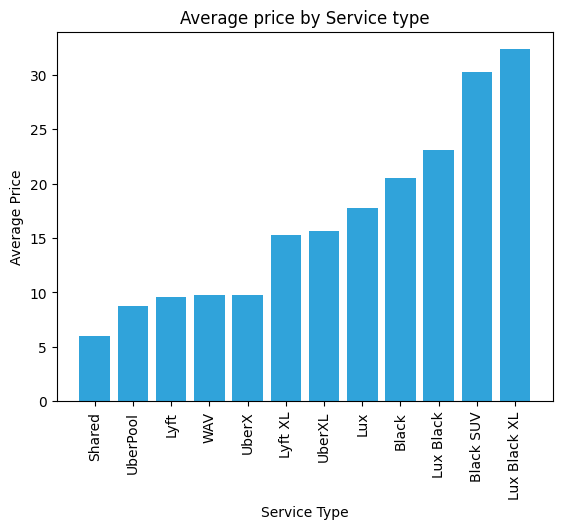

In [14]:
# PLOTTING `AVG_price` WITH `name`
plt.bar(name_price['name'], name_price['AVG_price'], color = "#30A3DA")
plt.xlabel('Service Type')
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.title('Average price by Service type')
plt.show()

$Insight:$

- From here we can see based on the service type `Shared` has the lowest average price of 6.029893, and `Lux Black XL` has the highest average price of 32.324086.
- The observed price differences may reflect the preferences of consumers. Some customers may prioritize cost savings and opt for the more affordable `Shared` service, while others may be willing to pay a premium for the luxury and exclusivity associated with `Lux` and `Black` services.

### 2. Continuing from the previous insight, we could also find how much the average `distance` grouped by the type of service (`name`).

In [15]:
name_distance = df.groupby('name')['distance'].agg(AVG_distance='mean').sort_values(by='AVG_distance').reset_index()

In [16]:
name_distance

,name,AVG_distance
0,Lux,2.186968
1,Lux Black,2.186968
2,Lux Black XL,2.186968
3,Lyft,2.186968
4,Lyft XL,2.186968
5,Shared,2.187012
6,Black SUV,2.191378
7,UberXL,2.191378
8,WAV,2.191378
9,UberX,2.191390


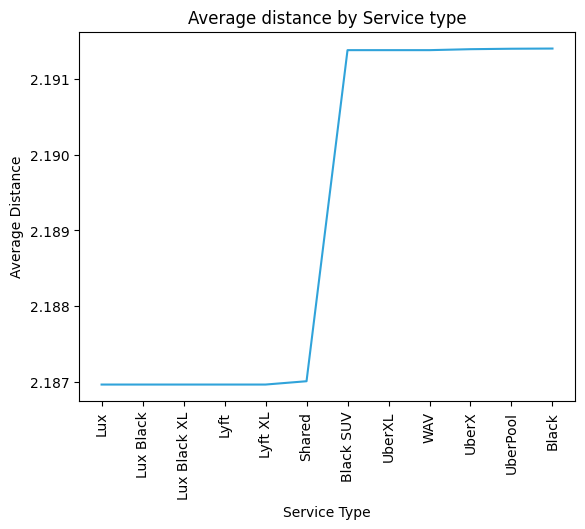

In [17]:
# PLOTTING `AVG_distance` WITH `name`
plt.plot(name_distance['name'], name_distance['AVG_distance'], color = "#30A3DA")
plt.xlabel('Service Type')
plt.xticks(rotation=90)
plt.ylabel('Average Distance')
plt.title('Average distance by Service type')
plt.show()

$Insight:$

- Unlike the previous comparison, it seems that average `distance` is much less affected by the service type (`name`). As different service type could have similar distance.

### 3. Let's dive a little deeper into the `distance` column, by examining it's mean, median, modus, standard deviation, and skew.

In [18]:
# DESCRIPTIVE ANALYSIS OF `distance` COLUMN
print(f"Distance mean: {df['distance'].mean()}")
print(f"Distance mode: {df['distance'].mode()[0]}")
print(f"Distance median: {df['distance'].median()}")
print(f"Distance std: {df['distance'].std()}")
print(f"Distance skew: {df['distance'].skew()}")

Distance mean: 2.189261100731062
Distance mode: 2.66
Distance median: 2.16
Distance std: 1.135413018186186
Distance skew: 0.8168484903389348


In [19]:
# FINDING THE UPPER AND LOWER BOUNDARY OF 'distance' COLUMN
q1 = df['distance'].quantile(0.25)
q3 = df['distance'].quantile(0.75)
iqr = q3 - q1

# Tukey's Rule (SKEW >= |0.5|)
up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 5.42
Lower Boundary: -1.22


In [20]:
df_distance = df.groupby('distance').size().reset_index(name='count')

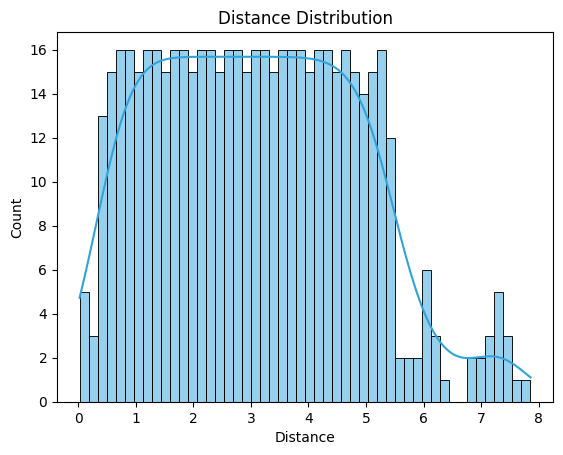

In [21]:
# SEABORN FOR A BETTER LOOKING GRAPH
sns.histplot(df_distance['distance'],kde=True, bins=50, color="#30A3DA") # bins=50, gave a good balance of detail and understandability
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distance Distribution')
plt.show()

$Insight:$

- Mean distance (2.18), median (2.16), and mode (2.66) suggests that most users used the services mostly for shorter distance travel.
- The standard deviation is ~1.14 units, indicating a moderate amount of variability in the distances.
- The skewness value of 0.82 suggests a rightward skew in the distribution. This means that the tail on the right side of the distribution is longer or the left side, as can be seen from the visualization.

### 4. Let's also dive a little deeper into the `price` column, by examining it's mean, median, modus, standard deviation, and skew.

In [22]:
# DESCRIPTIVE ANALYSIS OF `price` COLUMN
print(f"price mean: {df['price'].mean()}")
print(f"price mode: {df['price'].mode()[0]}")
print(f"price median: {df['price'].median()}")
print(f"price std: {df['price'].std()}")
print(f"price skew: {df['price'].skew()}")

price mean: 16.545125490614065
price mode: 7.0
price median: 13.5
price std: 9.324358581411627
price skew: 1.0457470560899258


In [23]:
# FINDING THE UPPER AND LOWER BOUNDARY OF 'distance' COLUMN
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# Tukey's Rule (SKEW >= |0.5|)
up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 42.75
Lower Boundary: -11.25


In [24]:
df_price = df.groupby('price').size().reset_index(name='count')

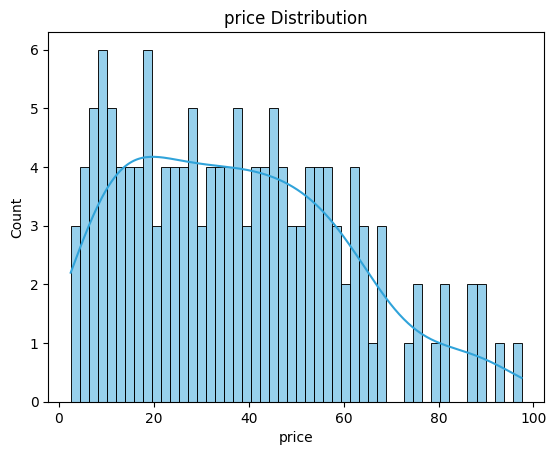

In [25]:
sns.histplot(df_price['price'],kde=True, bins=50, color="#30A3DA") # bins=50, gave a good balance of detail and understandability
plt.xlabel('price')
plt.ylabel('Count')
plt.title('price Distribution')
plt.show()

### 5. Finally, in what `day` and `hour` is there more ride-sharing occurences?

In [26]:
df_hour = df.groupby('hour').size().reset_index(name='count')

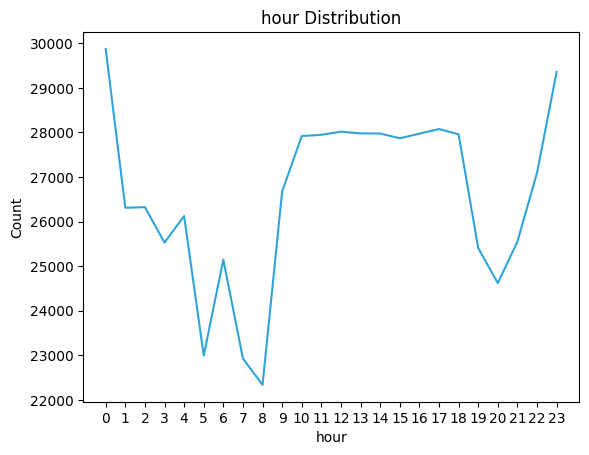

In [27]:
plt.plot(df_hour['hour'], df_hour['count'], color="#30A3DA")
plt.xticks(df_hour['hour'])
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('hour Distribution')
plt.show()

In [28]:
df_day = df.groupby('day').size().reset_index(name='count')

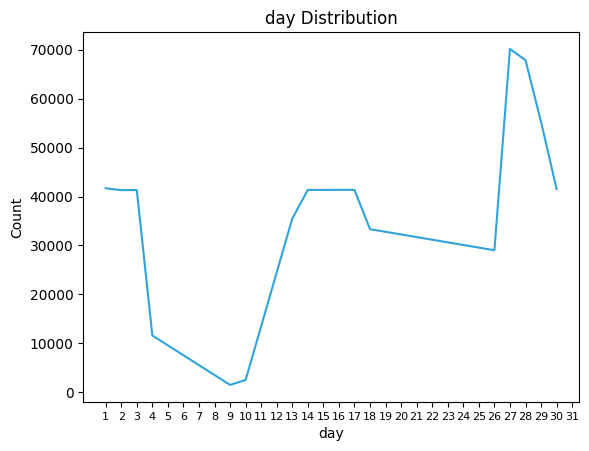

In [29]:
plt.plot(df_day['day'], df_day['count'], color="#30A3DA")
plt.xticks(range(1,32), size= 8)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('day Distribution')
plt.show()

# 4. Feature Engineering

## A. Split between X (Features) and y (Target)

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/rideshare_kaggle.csv', on_bad_lines ='skip')
df = df.dropna()

We shall use `price` as the target variable (y).

In [31]:
x = df.drop(columns=['price'])

In [32]:
y = df['price']

## B. Split between Train-Set and Test-Set

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=21)

x_train.shape, x_test.shape

((510380, 56), (127596, 56))

## C. Handling Cardinality

In [34]:
# SPLITTING THE DF INTO CATEGORIC AND NUMERIC
category_cols = df.select_dtypes(include=object).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

#### Categoric Columns

In [35]:
category_cols

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

As we have previously done in the EDA section, we will remove columns that have been deemed redundant with the only difference being the inclusion of `short_summary`.

In [36]:
columns_to_remove = ['id', 'datetime', 'timezone', 'product_id', 'long_summary', 'icon']
category_cols = [column for column in category_cols if column not in columns_to_remove]

In [37]:
# FIND UNIQUE VALUES IN df_category TO DETERMINE CARDINALITY
for column in category_cols:
  print(f"{column} unique values: {len(df[column].unique())}")

source unique values: 12
destination unique values: 12
cab_type unique values: 2
name unique values: 12
short_summary unique values: 9


For now we can assume that the categorical columns have either a low cardinality (`cab_type`) or moderate cardinality (`source`, `destination`, `cab_type`, `name`, `short_summary`).

## D. Handling Outlier

In [38]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### `distance` outlier:

In [39]:
upper_boundary_distance, lower_boundary_distance = find_skewed_boundaries(x_train, 'distance', 1.5)
upper_boundary_distance, lower_boundary_distance

(5.42, -1.2200000000000002)

We have previously found that `distance` have a skewed distribution, so to find the outlier we will use:

In [40]:
print('Total rides : {}'.format(len(x_train)))
print('Rides with distance more than 5.42   : {}'.format(len(x_train[x_train['distance'] > upper_boundary_distance])))
print('')
print('% rides with distance more than 5.42 : {}'.format(len(x_train[x_train['distance'] > upper_boundary_distance])/len(x_train) * 100))

Total rides : 510380
Rides with distance more than 5.42   : 5345

% rides with distance more than 5.42 : 1.0472589051295114


$Insight:$

Only the upper boundaries count since the lower boundaries are negative value, for `distance` we observe that 1.04% of the values in the dataset fall above the boundaries.

In [41]:
# Flag the outliers in category `distance`
outliers_distance = np.where(x_train['distance'] > upper_boundary_distance, True,
                       np.where(x_train['distance'] < lower_boundary_distance, True, False))

x_train_trimmed = x_train.loc[~(outliers_distance)]

print('Size dataset - Before trimming : ', x_train.shape)
print('Size dataset - After trimming  : ', x_train_trimmed.shape)

Size dataset - Before trimming :  (510380, 56)
Size dataset - After trimming  :  (505035, 56)


In [42]:
# TRIMMING y_train

indices_to_keep = x_train_trimmed.index

y_train_trimmed = y_train.loc[indices_to_keep]


In [43]:
x_train = x_train_trimmed
y_train = y_train_trimmed

## E. Handling Missing Values

In [44]:
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## F. Feature Selection

#### Selecting features from categorical columns:

In [45]:
#We will use a for loop to get the Kendall Tau values of each categorical features.
for i in category_cols:
    corr_tau, pval_k = stats.kendalltau(df['price'], df[i])

    if pval_k > 0.05:
        print("")
        print(f"- No significant correlation between 'price' and {i}")
    else:
        print("")
        print(f"- Significant correlation between 'price' and {i}:")
        print(f"  Kendall correlation: {corr_tau:.2f}, p-value: {pval_k}")


- Significant correlation between 'price' and source:
  Kendall correlation: -0.01, p-value: 2.3529257792795844e-49

- Significant correlation between 'price' and destination:
  Kendall correlation: -0.03, p-value: 2.33081827277028e-278

- Significant correlation between 'price' and cab_type:
  Kendall correlation: -0.06, p-value: 0.0

- Significant correlation between 'price' and name:
  Kendall correlation: -0.40, p-value: 0.0

- No significant correlation between 'price' and short_summary


$Insight:$

Based on the correlation tests, `source`, `destination`, `cab_type` and `name` have a significant correlation to `price`.

#### Selecting features from the numerical columns:

In [46]:
num_cols

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

Just like in the previous EDA section, we shall drop the `timestamp` column, and use the rest of the columns.

In [47]:
num_cols.remove('timestamp')

In [48]:
for i in num_cols:
    corr_r, pval_p = stats.pearsonr(df['price'], df[i])
    corr_rho, pval_s = stats.spearmanr(df['price'], df[i])
    corr_tau, pval_k = stats.kendalltau(df['price'], df[i])

    if pval_p > 0.05 or pval_s > 0.05 or pval_k > 0.05:
      print("")
      print(f"- No significant correlation between 'price' and {i}")
    else:
      print("")
      print(f"- Significant correlation between 'price' and {i}:")
      print(f"  Pearson correlation: {corr_r:.2f}, p-value: {pval_p}")
      print(f"  Spearman correlation: {corr_rho:.2f}, p-value: {pval_s}")
      print(f"  Kendall correlation: {corr_tau:.2f}, p-value: {pval_k}")


- No significant correlation between 'price' and hour

- No significant correlation between 'price' and day

- No significant correlation between 'price' and month

- Significant correlation between 'price' and price:
  Pearson correlation: 1.00, p-value: 0.0
  Spearman correlation: 1.00, p-value: 0.0
  Kendall correlation: 1.00, p-value: 0.0

- Significant correlation between 'price' and distance:
  Pearson correlation: 0.35, p-value: 0.0
  Spearman correlation: 0.33, p-value: 0.0
  Kendall correlation: 0.24, p-value: 0.0

- Significant correlation between 'price' and surge_multiplier:
  Pearson correlation: 0.24, p-value: 0.0
  Spearman correlation: 0.17, p-value: 0.0
  Kendall correlation: 0.14, p-value: 0.0

- No significant correlation between 'price' and latitude

- No significant correlation between 'price' and longitude

- No significant correlation between 'price' and temperature

- No significant correlation between 'price' and apparentTemperature

- No significant correlati

$Insight:$

Based on the correlation tests, `distance` and `surge_multiplier` have a significant correlation to `price`.

## G. Split between Numerical Columns and Categorical Columns

In [49]:
category_cols = ['source', 'destination', 'cab_type', 'name']

In [50]:
num_cols = ['distance', 'surge_multiplier']

In [51]:
x_train_kat = x_train[category_cols]
x_test_kat = x_test[category_cols]
x_train_num = x_train[num_cols]
x_test_num = x_test[num_cols]

## H.  Feature Scaling

StandardScaler is used because the features have different scales, for example `distance` to `surge_multiplier`.

In [52]:
scaler = StandardScaler()
x_train_num = scaler.fit_transform(x_train[num_cols])
x_test_num = scaler.transform(x_test[num_cols])

In [53]:
x_train_num

array([[-0.80005117, -0.15860794],
       [ 1.31778054, -0.15860794],
       [-0.29895706, -0.15860794],
       ...,
       [ 0.22104626, -0.15860794],
       [ 0.91123249, -0.15860794],
       [-0.47859457, -0.15860794]])

In [54]:
x_test_num

array([[ 0.78832262, -0.15860794],
       [-0.40295772, -0.15860794],
       [-0.73386893, -0.15860794],
       ...,
       [ 0.66541274, -0.15860794],
       [ 0.28722851, -0.15860794],
       [-1.05532553, -0.15860794]])

## I. Feature Encoding

In [55]:
x_train_kat['source'].unique()

array(['Financial District', 'South Station', 'Beacon Hill',
       'North Station', 'North End', 'Back Bay', 'Theatre District',
       'Haymarket Square', 'Northeastern University', 'Boston University',
       'West End', 'Fenway'], dtype=object)

In [56]:
x_train_kat['destination'].unique()

array(['Haymarket Square', 'Back Bay', 'West End', 'Boston University',
       'South Station', 'Financial District', 'Theatre District',
       'Fenway', 'Northeastern University', 'North Station',
       'Beacon Hill', 'North End'], dtype=object)

In [57]:
x_train_kat['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [58]:
x_train_kat['name'].unique()

array(['Lux Black XL', 'Black SUV', 'Lyft', 'Lux Black', 'Lux', 'UberXL',
       'Lyft XL', 'UberX', 'Shared', 'WAV', 'UberPool', 'Black'],
      dtype=object)

We use One-Hot Encoding because it is a way to represent categorical variables as binary vectors, making them suitable for algorithms that require numerical input such as Linear Regression.

In [59]:
enc_nom=OneHotEncoder()
enc_nom.fit(x_train_kat[category_cols])

x_train_enc = enc_nom.transform(x_train_kat[category_cols]).toarray()
x_test_enc = enc_nom.transform(x_test_kat[category_cols]).toarray()

In [60]:
x_test_enc

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
x_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
dt_kat_nom = x_train_kat[category_cols].copy()
dt_kat_nom[[
    'source_Financial District','source_South Station','source_Beacon Hill','source_North Station','source_North End','source_Back Bay',
    'source_Theatre District','source_Haymarket Square','source_Northeastern University','source_Boston University','source_West End','source_Fenway',
    'destination_Haymarket Square','destination_Back Bay','destination_West End','destination_Boston University','destination_South Station','destination_Financial District',
    'destination_Theatre District','destination_Fenway','destination_Northeastern University','destination_North Station','destination_Beacon Hill','destination_North End',
    'cab_type_Lyft', 'cab_type_Uber','name_Lux Black XL','name_Black SUV','name_Lyft','name_Lux Black','name_Lux','name_UberXL',
    'name_Lyft XL','name_UberX','name_Shared','name_WAV','name_UberPool','name_Black',]]=x_train_enc

In [63]:
dt_kat_nom_test = x_test_kat[category_cols].copy()
dt_kat_nom_test[[
    'source_Financial District','source_South Station','source_Beacon Hill','source_North Station','source_North End','source_Back Bay',
    'source_Theatre District','source_Haymarket Square','source_Northeastern University','source_Boston University','source_West End','source_Fenway',
    'destination_Haymarket Square','destination_Back Bay','destination_West End','destination_Boston University','destination_South Station','destination_Financial District',
    'destination_Theatre District','destination_Fenway','destination_Northeastern University','destination_North Station','destination_Beacon Hill','destination_North End',
    'cab_type_Lyft', 'cab_type_Uber','name_Lux Black XL','name_Black SUV','name_Lyft','name_Lux Black','name_Lux','name_UberXL',
    'name_Lyft XL','name_UberX','name_Shared','name_WAV','name_UberPool','name_Black',]]=x_test_enc

In [64]:
dt_kat_nom.drop(columns =['source','destination','cab_type','name'], inplace= True)

In [65]:
dt_kat_nom_test.drop(columns =['source','destination','cab_type','name'], inplace= True)

In [66]:
dt_kat_nom = dt_kat_nom.reset_index(drop=True)
dt_kat_nom_test = dt_kat_nom_test.reset_index(drop=True)

## J. Concate between Numerical Columns and Categorical Columns

#### For `x_train_final`

In [67]:
x_train_final = pd.DataFrame()
x_train_final[num_cols] = x_train_num
x_train_final = x_train_final.reset_index(drop=True)

In [68]:
x_train_num.shape

(505035, 2)

In [69]:
dt_kat_nom.shape

(505035, 38)

In [70]:
x_train_final = pd.concat([x_train_final, dt_kat_nom], axis=1)

In [71]:
x_train_final.shape

(505035, 40)

In [72]:
x_train_final

,distance,surge_multiplier,source_Financial District,source_South Station,source_Beacon Hill,source_North Station,source_North End,source_Back Bay,source_Theatre District,source_Haymarket Square,...,name_Lyft,name_Lux Black,name_Lux,name_UberXL,name_Lyft XL,name_UberX,name_Shared,name_WAV,name_UberPool,name_Black
0,-0.800051,-0.158608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.317781,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.298957,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.154864,-0.158608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.563686,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505030,1.062506,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
505031,-0.894597,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505032,0.221046,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505033,0.911232,-0.158608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### For `x_test_final`

In [73]:
x_test_final = pd.DataFrame()
x_test_final[num_cols] = x_test_num
x_test_final = x_test_final.reset_index(drop=True)

In [74]:
print(x_train_final.index)
print(dt_kat_nom.index)

RangeIndex(start=0, stop=505035, step=1)
RangeIndex(start=0, stop=505035, step=1)


In [75]:
x_test_final = pd.concat([x_test_final, dt_kat_nom_test], axis=1)

In [76]:
x_test_final.shape

(127596, 40)

In [77]:
x_test_final

,distance,surge_multiplier,source_Financial District,source_South Station,source_Beacon Hill,source_North Station,source_North End,source_Back Bay,source_Theatre District,source_Haymarket Square,...,name_Lyft,name_Lux Black,name_Lux,name_UberXL,name_Lyft XL,name_UberX,name_Shared,name_WAV,name_UberPool,name_Black
0,0.788323,-0.158608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.402958,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.733869,-0.158608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.573141,-0.158608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.145409,-0.158608,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127591,2.272696,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127592,0.126500,-0.158608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127593,0.665413,-0.158608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127594,0.287229,-0.158608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 5. Model Definition

1. Algoritma yang dipakai adalah `Ridge Regression`.
   
   Alasan :
   - Karena nilai R2 score dari test-set paling tinggi dibanding `linear regression` dan `lasso regression`.
   - Karena target (y) merupakan nilai bukan class.

2. Metrics yang akan dipakai adalah `Mean Absolute Error (MAE)`, `Mean Squared Error (MSE)`, `Root Mean Squared Error (RMSE)`.
   * Alasan : 3 Metrics digunakan untuk mendapat perbandingan konkrit antar train-set dan test-set serta terhadap masing-masing algoritma.

# 6. Model Training

## Linear Regression

In [78]:
model_lin_reg = LinearRegression()

In [79]:
model_lin_reg.fit(x_train_final, y_train)

LinearRegression()

In [80]:
y_train_predict_lr = model_lin_reg.predict(x_train_final)
y_test_predict_lr = model_lin_reg.predict(x_test_final)

## Lasso Regression

In [81]:
model_lasso_alpha_01 = Lasso(alpha=0.01)
model_lasso_alpha_01.fit(x_train_final, y_train)

Lasso(alpha=0.01)

In [82]:
y_train_predict_las = model_lasso_alpha_01.predict(x_train_final)
y_test_predict_las = model_lasso_alpha_01.predict(x_test_final)

## Ridge Regression

In [83]:
model_ridge_alpha_1 = Ridge(alpha=0.01)
model_ridge_alpha_1.fit(x_train_final, y_train)

Ridge(alpha=0.01)

In [84]:
y_train_predict_r = model_ridge_alpha_1.predict(x_train_final)
y_test_predict_r = model_ridge_alpha_1.predict(x_test_final)

## Polynomial Regression

In [85]:
#poly_d2 = PolynomialFeatures(degree=2)
#X_train_poly_d2 = poly_d2.fit_transform(x_train_final)
#X_test_poly_d2 = poly_d2.transform(x_test_final)

In [86]:
#model_linreg_poly_d2 = LinearRegression()
#model_linreg_poly_d2.fit(X_train_poly_d2, y_train)

# 7. Model Evaluation

## Linear Regression

In [87]:
print("Measuring on Train set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_predict_lr)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_predict_lr)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_train, y_train_predict_lr, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_predict_lr)
print('r2_score is : ', r2_scorevalue )

Measuring on Train set.

Mean Absolute Error Value is :  1.7098100331227042
Mean Squared Error Value is :  5.830225025832757
RMSE Value is :  2.414585891169075
r2_score is :  0.9315543484145733


In [88]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_test_predict_lr)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_test_predict_lr)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_test, y_test_predict_lr, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_test_predict_lr)
print('r2_score is : ', r2_scorevalue )

Measuring on Testing set.

Mean Absolute Error Value is :  1.7534388321627457
Mean Squared Error Value is :  6.289463286907332
RMSE Value is :  2.507880237752061
r2_score is :  0.9277438747737408


$Insight:$
- Linear Regression performed well on both train and test set.

## Lasso Regression

In [89]:
print("Measuring on Train set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_predict_las)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_predict_las)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_train, y_train_predict_las, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_predict_las)
print('r2_score is : ', r2_scorevalue )

Measuring on Train set.

Mean Absolute Error Value is :  1.7045832717088867
Mean Squared Error Value is :  5.8722664931592945
RMSE Value is :  2.423275983696305
r2_score is :  0.9310607901707624


In [90]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_test_predict_las)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_test_predict_las)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_test, y_test_predict_las, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_test_predict_las)
print('r2_score is : ', r2_scorevalue )

Measuring on Testing set.

Mean Absolute Error Value is :  1.7482217065146597
Mean Squared Error Value is :  6.321477415920889
RMSE Value is :  2.514254843073965
r2_score is :  0.9273760823549777


$Insight:$
- Lasso Regression performed well on both train and test set.

## Ridge Regression

In [91]:
print("Measuring on Train set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_train, y_train_predict_r)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_train, y_train_predict_r)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_train, y_train_predict_r, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_train, y_train_predict_r)
print('r2_score is : ', r2_scorevalue )

Measuring on Train set.

Mean Absolute Error Value is :  1.7098073801630693
Mean Squared Error Value is :  5.8302249383121705
RMSE Value is :  2.414585873045763
r2_score is :  0.9315543494420471


In [92]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_test_predict_r)
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_test_predict_r)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Mean Squared Error
RMSEValue = mean_squared_error(y_test, y_test_predict_r, squared=False)
print('RMSE Value is : ', RMSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(y_test, y_test_predict_r)
print('r2_score is : ', r2_scorevalue )

Measuring on Testing set.

Mean Absolute Error Value is :  1.753436374645112
Mean Squared Error Value is :  6.289466592610643
RMSE Value is :  2.507880896815206
r2_score is :  0.9277438367963647


$Insight:$
- Ridge Regression performed well on both train and test set.

# 8. Model Inference

In [93]:
x_train_final.columns

Index(['distance', 'surge_multiplier', 'source_Financial District',
       'source_South Station', 'source_Beacon Hill', 'source_North Station',
       'source_North End', 'source_Back Bay', 'source_Theatre District',
       'source_Haymarket Square', 'source_Northeastern University',
       'source_Boston University', 'source_West End', 'source_Fenway',
       'destination_Haymarket Square', 'destination_Back Bay',
       'destination_West End', 'destination_Boston University',
       'destination_South Station', 'destination_Financial District',
       'destination_Theatre District', 'destination_Fenway',
       'destination_Northeastern University', 'destination_North Station',
       'destination_Beacon Hill', 'destination_North End', 'cab_type_Lyft',
       'cab_type_Uber', 'name_Lux Black XL', 'name_Black SUV', 'name_Lyft',
       'name_Lux Black', 'name_Lux', 'name_UberXL', 'name_Lyft XL',
       'name_UberX', 'name_Shared', 'name_WAV', 'name_UberPool', 'name_Black'],
      dtyp

In [94]:
new_data=np.array([3,-0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
new_data=new_data.reshape(1, -1)
new_data.shape

model_lin_reg.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.32295774e+10])

# 9. Model Saving

In [96]:
import pickle, joblib
import json

with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(enc_nom, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_cols, file_4)

with open('list_cat_cols.txt','w') as file_5:
  json.dump(category_cols, file_5)

# Conclusion

- The chosen features are `source`, `distance`, `cab_type`, `name`, `surge_multiplier`,`distance`. Based on pearson's correlation for the numerical features and kendall's tau for categoric features.
- The chosen metric is MSE, because the target is a currency and therefore cannot be negative.
- The chosen algorithm is `ridge regression` since it has the highest test set r2 score.
- The Model's weakness is that the prediction doesn't go higher than around 40000, despite the actual data being in that range.

In [ ]:
model_lin_reg.coef_

In [98]:
model_lin_reg.intercept_

-100879185402.1554